### Final project submission
**Students Name:**

1. Joackim Kisienya
2. Eric Metobo
3. Hezron Rumenya
4. Joy Sila
5. Lynn Kyalo
6. Newton Njeri

**Students pace:** Part Time

**Instructor Name:** Maryan Mwikali

## MOVIE STUDIO VENTURE ANALYSIS

![Alt text](https://images.unsplash.com/photo-1655199153917-5f909ea93e99?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D) 

## 1. PROJECT UNDERSTANDING
### Project Overview
Since our company is entering into original film production space, directly competing with more established movie studios and even streaming platforms like Netflix et al, this project will leverage on the analysis of box office trends, audience preferences, ratings, time of release and even financial performance and best perfoming genres for the company to achieve success in this sphere. The main aim is to transalate these insights into actionable strategies for a highly viable commercial venture.



### Project Statement
This project's end product is to determine which types of films are most successful by doing analysis of genre trends, all types of audience ratings and financial returns-this includes cost benefit analysis and comparing budgets vis a vis ROI. By using data-driven decision-making, we will produce a framework for selecting optimal film genres whose budgets and ROI align with best release period coupled with marketing strategies that will help maximize the studio's returns on Investment/success.

### General Objective
Our general objective is to use data science methodologies to analyze box office performance, audience preferences and financial patterns, with the goal of generating actionable insights to help the company's new movie studio make informed decisions about film production. This will be achieved by:
 1. Identifying genres that perform best in terms of cost, revenue, profitability and rating.
 2. Determining the optimal release period, casting, themes & or storytelling elements. 
 3. Recommending high-potential film types for exploration and development. 

### Expected Outcomes
***Box office Performance analysis***- A detailed analysis into the top performing genres using various metrics such as average revenue per genre over the last 15years.The financial pattern analysis by getting the relationship between budget and revenue.The characteristics of successiful films by including ratings and storytelling trends as well as time of release.

***Predictive Models***-Forecasting box office revenue based on budget and ratings, high success genres based on historical trends as well as clustering techniques to target demographics.

***Investment strategy***- To define optimal budget range that corresponds with efficient ROI

***Film recommendations strategy***- genre selection with a high-performance metrics backed by data. The best/optimal release periods based on box office trends. Casting strategies of identifying most impactful directors or writers for success i.e earnings per top director/producer comparisons and market demand.

### Metrics of Success
**1. Financial Metrics**- Box office revenue, its profit margins, Budget efficiency and ROI.    
**2. Audience/Market Metrics**-The genre popularity, its ratings performance as well as audience demographics(age, gender etc)    
**3. Production & release metrics**-The optimal release timing, the runtime impact and influence of directors/producers

## 2. DATA UNDERSTANDING

In [1]:
#Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer # converts a column containing lists of labels (e.g., ["Action", "Comedy"]) into one-hot / dummy columns
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading dataset
conn = sqlite3.connect('zippedData/im.db/im.db')

In [3]:
#check tables
pd.read_sql(""" 
SELECT *
    FROM sqlite_master
    """
, conn
)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
#reading contents of table movie basics
movie_basics= pd.read_sql(""" 
SELECT *
FROM movie_basics
    """
, conn
)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#reading contents of table movie ratings
movie_ratings= pd.read_sql(""" 
SELECT *
FROM movie_ratings
    """
, conn
)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Summary for `movie_basics` and `movie_ratings` datasets:
---
### **movie_basics**
- **Purpose:** Contains metadata about movies.
- **Key Columns:**
  - `movie_id`: Unique identifier for each movie.
  - `primary_title`: Main title of the movie.
  - `original_title`: Original title (may differ for international releases).
  - `start_year`: Year the movie was released.
  - `runtime_minutes`: Duration of the movie.
  - `genres`: Movie genres (can be multiple, separated by commas).
- **Usage:** Useful for exploring movie characteristics, genres, and trends over time.
---
### **movie_ratings**
- **Purpose:** Contains user ratings for movies.
- **Key Columns:**
  - `movie_id`: Foreign key linking to `movie_basics`.
  - `averagerating`: Average user rating for the movie.
  - `numvotes`: Number of user votes.
- **Usage:** Useful for analyzing movie popularity, rating distributions, and identifying highly rated or controversial movies.
---
- **Join on `movie_id`** to combine metadata and ratings for deeper analysis (e.g., how genre or runtime affects ratings).

In [6]:
#Join movie_basics and movie_ratings
imdb= pd.read_sql(""" 
SELECT *
    FROM movie_ratings
    LEFT JOIN movie_basics
    USING(movie_id)
    """
, conn
)
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [8]:
percentage_missing = imdb.isnull().sum() * 100/len(imdb)
percentage_missing

movie_id            0.000000
averagerating       0.000000
numvotes            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
dtype: float64

In [9]:
#Drop missing values
imdb = imdb.dropna(subset=('runtime_minutes','genres'))
imdb.reset_index(drop=True)
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [10]:
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Merge with budgets_df on different column names
merged_df = pd.merge(
    imdb,
    budgets_df,
    left_on='primary_title',       # key in merged_df
    right_on='movie',       # key in budgets_df
    how='inner'
)

# Merge with gross_df on different column names
merged_df = pd.merge(
    merged_df,
    gross_df,
    left_on='movie',          # key in merged_df
    right_on='title',    # key in gross_df
    how='inner'
)
merged_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",The Legend of Hercules,"$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",Baggage Claim,"$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",Moneyball,"$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",Hereafter,"$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000,2010
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",44,"Mar 16, 2012",21 Jump Street,"$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000,2012


In [13]:
merged_df.drop(['start_year', 'original_title','id','primary_title','movie','year'], axis=1, inplace=True)
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy","Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000
1,tt1171222,5.1,8296,96.0,Comedy,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport","Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance","Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime","Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000


In [14]:
#Summary statistics for imdb dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1379 non-null   object 
 1   averagerating      1379 non-null   float64
 2   numvotes           1379 non-null   int64  
 3   runtime_minutes    1379 non-null   float64
 4   genres             1379 non-null   object 
 5   release_date       1379 non-null   object 
 6   production_budget  1379 non-null   object 
 7   domestic_gross_x   1379 non-null   object 
 8   worldwide_gross    1379 non-null   object 
 9   title              1379 non-null   object 
 10  studio             1379 non-null   object 
 11  domestic_gross_y   1378 non-null   float64
 12  foreign_gross      1182 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 140.2+ KB


## 3. DATA CLEANING AND TRANSFORMATION

In [15]:
percentage_missing = merged_df.isnull().sum() * 100/len(imdb)
percentage_missing

movie_id             0.000000
averagerating        0.000000
numvotes             0.000000
runtime_minutes      0.000000
genres               0.000000
release_date         0.000000
production_budget    0.000000
domestic_gross_x     0.000000
worldwide_gross      0.000000
title                0.000000
studio               0.000000
domestic_gross_y     0.001522
foreign_gross        0.299757
dtype: float64

In [16]:
#Summary statistics for imdb dataset
merged_df.describe()

,averagerating,numvotes,runtime_minutes,domestic_gross_y
count,1379.000000,1.379000e+03,1379.000000,1.378000e+03
mean,6.438724,1.161493e+05,107.296592,6.067686e+07
std,1.014421,1.651254e+05,19.714502,8.515963e+07
min,1.600000,5.000000e+00,3.000000,8.000000e+02
25%,5.900000,1.508050e+04,95.000000,7.250000e+06
50%,6.500000,6.030400e+04,105.000000,3.370000e+07
75%,7.100000,1.396090e+05,118.000000,7.390000e+07
max,9.200000,1.841066e+06,192.000000,7.001000e+08


In [17]:
merged_df.columns

Index(['movie_id', 'averagerating', 'numvotes', 'runtime_minutes', 'genres',
       'release_date', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross'],
      dtype='object')

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1379 non-null   object 
 1   averagerating      1379 non-null   float64
 2   numvotes           1379 non-null   int64  
 3   runtime_minutes    1379 non-null   float64
 4   genres             1379 non-null   object 
 5   release_date       1379 non-null   object 
 6   production_budget  1379 non-null   object 
 7   domestic_gross_x   1379 non-null   object 
 8   worldwide_gross    1379 non-null   object 
 9   title              1379 non-null   object 
 10  studio             1379 non-null   object 
 11  domestic_gross_y   1378 non-null   float64
 12  foreign_gross      1182 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 140.2+ KB


**Further Data Cleaning and transformation**
1. release_date - Transform by creating two variables - Data and month columns, and group by seasons
2. production_budget - Remove the dollar sign
3. domestic_gross_x - Drop this and use domestic_gross_y
4. worldwide_gross - Drop dollar sign

In [19]:
#1. Transform the release_date by creating two variables - year and month columns, and group by seasons 
#  Make sure release_date is datetime
merged_df["release_date"] = pd.to_datetime(
    merged_df["release_date"],              
    errors="coerce"                          
)

#  Create year & month columns
merged_df["release_year"]  = merged_df["release_date"].dt.year
merged_df["release_month"] = merged_df["release_date"].dt.month   # 1–12

# Map month columns to season
# ─────────────────────────────────────────────
month_to_season = {
    12: "Winter",  1: "Winter",  2: "Winter",
     3: "Spring",  4: "Spring",  5: "Spring",
     6: "Summer",  7: "Summer",  8: "Summer",
     9: "Autumn", 10: "Autumn", 11: "Autumn",
}
merged_df["season"] = merged_df["release_month"].map(month_to_season)

In [20]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,"$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000,2014,1,Winter
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,"$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000,2013,9,Autumn
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport",2011-09-23,"$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000,2011,9,Autumn
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance",2010-10-15,"$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000,2010,10,Autumn
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime",2012-03-16,"$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000,2012,3,Spring


In [21]:
# Remove the dollar signs and variables  (and commas) in production_budget and worldwide_gross and convert the result to float
merged_df["production_budget"] = (
    merged_df["production_budget"]
          .replace('[$,]', '', regex=True) 
          .astype(float)                      
)

merged_df["worldwide_gross"] = (
    merged_df["worldwide_gross"]
          .replace('[$,]', '', regex=True)
          .astype(float)
)
merged_df["foreign_gross"] = (
    merged_df["worldwide_gross"]
          .replace('[$,]', '', regex=True)
          .astype(float)
)

In [22]:
# Drop the domestic_gross_x column – We consider the already cleaned variable domestic_gross_y
merged_df = merged_df.drop(columns="domestic_gross_x")    

In [23]:
merged_df.head(2)

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,18800000.0,58953319.0,2014,1,Winter
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,21600000.0,22885836.0,2013,9,Autumn


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1379 non-null   object        
 1   averagerating      1379 non-null   float64       
 2   numvotes           1379 non-null   int64         
 3   runtime_minutes    1379 non-null   float64       
 4   genres             1379 non-null   object        
 5   release_date       1379 non-null   datetime64[ns]
 6   production_budget  1379 non-null   float64       
 7   worldwide_gross    1379 non-null   float64       
 8   title              1379 non-null   object        
 9   studio             1379 non-null   object        
 10  domestic_gross_y   1378 non-null   float64       
 11  foreign_gross      1379 non-null   float64       
 12  release_year       1379 non-null   int32         
 13  release_month      1379 non-null   int32         
 14  season  

In [25]:
# Handle missing data by droping rows where domestic_gross_y is NaN

merged_df = merged_df.dropna(subset=['domestic_gross_y'])


# Handle missing data by filling missing such that foreign_gross = worldwide – domestic
missing_mask = merged_df['foreign_gross'].isna() & merged_df['worldwide_gross'].notna()

merged_df.loc[missing_mask, 'foreign_gross'] = (
    merged_df.loc[missing_mask, 'worldwide_gross']
    - merged_df.loc[missing_mask, 'domestic_gross_y'])

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 0 to 1378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1378 non-null   object        
 1   averagerating      1378 non-null   float64       
 2   numvotes           1378 non-null   int64         
 3   runtime_minutes    1378 non-null   float64       
 4   genres             1378 non-null   object        
 5   release_date       1378 non-null   datetime64[ns]
 6   production_budget  1378 non-null   float64       
 7   worldwide_gross    1378 non-null   float64       
 8   title              1378 non-null   object        
 9   studio             1378 non-null   object        
 10  domestic_gross_y   1378 non-null   float64       
 11  foreign_gross      1378 non-null   float64       
 12  release_year       1378 non-null   int32         
 13  release_month      1378 non-null   int32         
 14  season       

In [27]:
# Create two new variables: Profitability and ROI (Return on Investment) 
# Profitability  = worldwide_gross – production_budget
merged_df["profitability"] = merged_df["worldwide_gross"] - merged_df["production_budget"]

# ROI = profitability ÷ production_budget
merged_df["ROI"] = merged_df["profitability"] / merged_df["production_budget"]

# Optional: inspect the result
merged_df[["production_budget", "worldwide_gross", "profitability", "ROI"]].head()

,production_budget,worldwide_gross,profitability,ROI
0,70000000.0,58953319.0,-11046681.0,-0.157810
1,8500000.0,22885836.0,14385836.0,1.692451
2,50000000.0,111300835.0,61300835.0,1.226017
3,50000000.0,108660270.0,58660270.0,1.173205
4,42000000.0,202812429.0,160812429.0,3.828867


In [28]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season,profitability,ROI
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,18800000.0,58953319.0,2014,1,Winter,-11046681.0,-0.157810
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,21600000.0,22885836.0,2013,9,Autumn,14385836.0,1.692451
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport",2011-09-23,50000000.0,111300835.0,Moneyball,Sony,75600000.0,111300835.0,2011,9,Autumn,61300835.0,1.226017
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance",2010-10-15,50000000.0,108660270.0,Hereafter,WB,32700000.0,108660270.0,2010,10,Autumn,58660270.0,1.173205
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime",2012-03-16,42000000.0,202812429.0,21 Jump Street,Sony,138400000.0,202812429.0,2012,3,Spring,160812429.0,3.828867


In [29]:
# Split the comma-separated string into lists
merged_df["genres"] = (
    merged_df["genres"]
             .str.split(",")          # "Action,Comedy" → ["Action", "Comedy"]
             .apply(lambda lst: [g.strip() for g in lst])  # trim whitespace
)

# Create binary (dummy) columns for each genre
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(
    mlb.fit_transform(merged_df["genres"]),
    columns=mlb.classes_,
    index=merged_df.index
)

# Join back to original DataFrame
merged_df = merged_df.join(genre_dummies)

# Optional: inspect the result
print(merged_df.iloc[:5, :10])  # first 5 rows, first


    movie_id  averagerating  numvotes  runtime_minutes  \
0  tt1043726            4.2     50352             99.0   
1  tt1171222            5.1      8296             96.0   
2  tt1210166            7.6    326657            133.0   
3  tt1212419            6.5     87288            129.0   
4  tt1232829            7.2    477771            109.0   

                         genres release_date  production_budget  \
0  [Action, Adventure, Fantasy]   2014-01-10         70000000.0   
1                      [Comedy]   2013-09-27          8500000.0   
2     [Biography, Drama, Sport]   2011-09-23         50000000.0   
3     [Drama, Fantasy, Romance]   2010-10-15         50000000.0   
4       [Action, Comedy, Crime]   2012-03-16         42000000.0   

   worldwide_gross                   title studio  
0       58953319.0  The Legend of Hercules   LG/S  
1       22885836.0           Baggage Claim   FoxS  
2      111300835.0               Moneyball   Sony  
3      108660270.0               Hereaft

**Remove duplicates by checking the movie_id column**

In [30]:
# Find duplicated movie_id entries
duplicates = merged_df[merged_df.duplicated('movie_id', keep=False)]

# Display the duplicates
print(duplicates)

       movie_id  averagerating  numvotes  runtime_minutes  \
56    tt1155076            6.2    146401            140.0   
57    tt1155076            6.2    146401            140.0   
113   tt2843832            7.6        14             52.0   
114   tt2843832            7.6        14             52.0   
115   tt1828325            7.0        10            105.0   
116   tt1828325            7.0        10            105.0   
117   tt9447594            6.1        10            121.0   
118   tt9447594            6.1        10            121.0   
119   tt2039393            6.0     59995            111.0   
120   tt2039393            6.0     59995            111.0   
121   tt2924336            7.2      1479            109.0   
122   tt2924336            7.2      1479            109.0   
211   tt1111235            4.6        77             83.0   
212   tt1111235            4.6        77             83.0   
213   tt1924429            6.9    104951            101.0   
214   tt1924429         

In [31]:
# Keep the first occurrence, drop the rest
merged_df = merged_df.drop_duplicates(subset='movie_id', keep='first')

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1378
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1359 non-null   object        
 1   averagerating      1359 non-null   float64       
 2   numvotes           1359 non-null   int64         
 3   runtime_minutes    1359 non-null   float64       
 4   genres             1359 non-null   object        
 5   release_date       1359 non-null   datetime64[ns]
 6   production_budget  1359 non-null   float64       
 7   worldwide_gross    1359 non-null   float64       
 8   title              1359 non-null   object        
 9   studio             1359 non-null   object        
 10  domestic_gross_y   1359 non-null   float64       
 11  foreign_gross      1359 non-null   float64       
 12  release_year       1359 non-null   int32         
 13  release_month      1359 non-null   int32         
 14  season       

**Following, merging of datasets, data cleaning and transformation we end up with a final data frame with 39 columns and 1359 rows**

## 4. DATA ANALYSIS AND VISUALIZATION

In [33]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt1043726,4.2,50352,99.0,"[Action, Adventure, Fantasy]",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,...,0,0,0,0,0,0,0,0,0,0
1,tt1171222,5.1,8296,96.0,[Comedy],2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,...,0,0,0,0,0,0,0,0,0,0
2,tt1210166,7.6,326657,133.0,"[Biography, Drama, Sport]",2011-09-23,50000000.0,111300835.0,Moneyball,Sony,...,0,0,0,0,0,0,1,0,0,0
3,tt1212419,6.5,87288,129.0,"[Drama, Fantasy, Romance]",2010-10-15,50000000.0,108660270.0,Hereafter,WB,...,0,0,0,0,1,0,0,0,0,0
4,tt1232829,7.2,477771,109.0,"[Action, Comedy, Crime]",2012-03-16,42000000.0,202812429.0,21 Jump Street,Sony,...,0,0,0,0,0,0,0,0,0,0


#### 4.1 Working with genres column and related columns 

In [34]:
# Perform basic frequency analysis
genre_counts = genre_dummies.sum().sort_values(ascending=False)
print(genre_counts)
# This gives the total mentions across the datasets

Drama          717
Comedy         449
Action         380
Adventure      303
Thriller       238
Crime          204
Romance        178
Horror         147
Biography      125
Mystery        111
Sci-Fi         111
Fantasy        102
Animation       89
Family          74
History         45
Documentary     45
Music           40
Sport           30
War             13
Western          8
Musical          5
News             2
dtype: int64


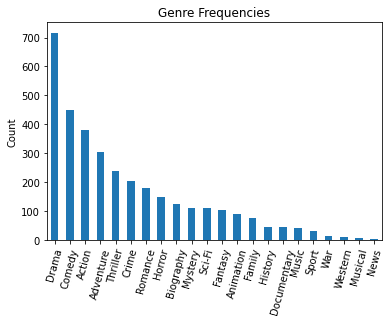

In [35]:
# Visual display of frequencies - bar plot
genre_counts.plot(kind='bar')
plt.title('Genre Frequencies')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

**Interpretation of the chart**    
The bar chart displays the frequency distribution of movie genres, revealing how often each genre appears in the dataset. From the chart, 
1. Drama is by far the most prevalent genre, appearing in over 700 films. This suggests that drama is a foundational or frequently used genre, likely due to its broad narrative scope and emotional appeal.
2. Followed by Comedy, Action, and Adventure are also highly common, each appearing in over 300 films. These genres tend to have broad audience appeal and are often used in combination with others, which could explain their high frequency.
3. Genres like Thriller, Crime, Romance, and Biography form a mid-tier group in terms of frequency, suggesting they are also popular choices but less dominant compared to the top few. These genres often overlap with others (e.g., Crime + Drama or Romance + Comedy), reinforcing their versatility.
4. Lower-frequency genres such as History, Animation, Fantasy, and Sci-Fi appear less frequently but are still notable. At the far end of the spectrum,
5. Genres like War, Western, Musical, and News are the least represented, indicating either niche appeal or reduced production frequency in the modern film landscape.

*Overall, the chart reveals that mainstream and emotionally resonant genres like Drama, Comedy, and Action dominate the dataset, while specialized or genre-specific categories such as Western, Musical, and News are comparatively rare. This distribution likely reflects both industry trends and audience demand.*

In [36]:
#Extract top 10 genres
top_genre = genre_dummies.sum().sort_values(ascending=False).head(10).index
# Filter the genre dummies to top 
top_genre_dummies = genre_dummies[top_genre]

In [37]:
# Create co-occurance matrix
co_occurrence = top_genre_dummies.T.dot(top_genre_dummies)

# Set diagonal to 0 (self-co-occurrence is not interesting)
#for genre in top_genre:
#    co_occurrence.at[genre, genre] = 0
co_occurrence

,Drama,Comedy,Action,Adventure,Thriller,Crime,Romance,Horror,Biography,Mystery
Drama,717,167,105,58,96,110,126,35,112,53
Comedy,167,449,69,115,3,54,100,11,23,4
Action,105,69,380,163,80,91,7,22,10,13
Adventure,58,115,163,303,15,14,4,5,8,3
Thriller,96,3,80,15,238,49,5,58,7,51
Crime,110,54,91,14,49,204,3,10,16,21
Romance,126,100,7,4,5,3,178,2,6,3
Horror,35,11,22,5,58,10,2,147,0,49
Biography,112,23,10,8,7,16,6,0,125,0
Mystery,53,4,13,3,51,21,3,49,0,111


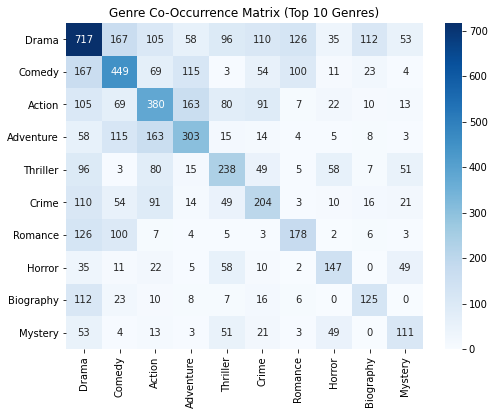

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Blues')
plt.title('Genre Co-Occurrence Matrix (Top 10 Genres)')
plt.show()

**Interpretation of the heatmap**  
The heatmap displays a genre co-occurrence matrix for the top 10 movie genres, showing how frequently each pair of genres appears together in the same movie. Each cell represents the number of times two genres co-occur, with darker shades indicating more frequent pairings. Diagonal values represent the total number of movies tagged with each individual genre, while off-diagonal cells show shared appearances.

1. From the matrix, we can see that Drama is the most commonly co-occurring genre, with 717 appearances and strong overlaps with Romance (126), Biography (112), Crime (110), and Comedy (167). This suggests that drama is a highly versatile genre often blended with others.
2. Comedy also shows a high self-count (449) and frequently pairs with Romance (100) and Adventure (115).
3. Action and Adventure are another frequently linked pair, co-occurring in 163 movies. one of the strongest cross-genre relationships in the matrix.
4. Thriller pairs notably well with Action (80) and Crime (49), forming a common trio of high-stakes genres.
5. Meanwhile, Crime sees substantial overlap with Drama (110) and Thriller (49), reinforcing the tendency of crime films to carry dramatic and suspenseful elements.
6. Genres such as Biography and Horror are more isolated, with lower cross-genre counts.
7. Biography is most often combined with Drama, while Horror appears occasionally with Thriller (58) and Mystery (49).

*Overall, the matrix shows strong genre combinations such as Drama + Romance, Action + Adventure, and Thriller + Crime, while also highlighting that some genres like Horror, Mystery, and Biography are more frequently used in focused or specialized narratives.*

In [39]:
# Create a normalized heat map
genre_by_season_row_norm = genre_by_season.div(genre_by_season.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(genre_by_season_row_norm, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Proportion of Movie Releases by Season (Per Genre)")
plt.xlabel("Season")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


NameError: name 'genre_by_season' is not defined

**Interpretation of the heat map**  
The heatmap visualizes the proportion of movie releases by season across different genres, normalized per genre. Each cell represents the share of a genre's total releases that occurred in a particular season—Autumn, Spring, Summer, or Winter—with darker shades indicating higher proportions.Some seasonal preferences emerging are.
1. Autumn is a notably popular release period, especially for genres like News, Sport, Musical, Mystery, and Horror, where nearly or exactly half of all releases fall in this season.
2. Similarly, Western and News genres are strongly associated with Winter, both having half of their releases in that season.
3. Spring shows a more balanced distribution overall, but certain genres like Documentary, War, and Romance show a slightly higher tendency to release during this period.
4. Summer, on the other hand, is dominant for genres such as Sci-Fi, Animation, and Music, where proportions exceed 0.33, highlighting a strategic alignment with blockbuster or family-oriented viewing trends.
5. Genres like Action, Comedy, and Adventure are fairly evenly spread across all four seasons, suggesting a year-round release strategy.
6. In contrast, History and Western show clear seasonal bias, preferring Winter, while genres like Fantasy, Drama, and Family are more evenly distributed but still slightly favor Autumn or Spring.

*Generally, while some genres maintain an even spread of releases throughout the year, others exhibit strong seasonal preferences especially in Autumn and Winter indicating targeted release strategies possibly tied to awards seasons, holidays, or peak box office periods.*

#### 4.2 working on rating and financial performance metrics
1. Average rating
2. Cost
3. Revenue
4. Profitability
5. Return on Investment

In [ ]:
#Compute rating and financial performance measures
results = []

for genre in top_genre:
    subset = merged_df[merged_df[genre] == 1]
    results.append({
        'genre': genre,
        'average_rating': subset['averagerating'].mean(),
        'average_production_cost': subset['production_budget'].mean(),
        'average_wwrevenue': subset['worldwide_gross'].mean(),
        'average_drevenue': subset['domestic_gross_y'].mean(),
        'average_frevenue': subset['foreign_gross'].mean(),
        'average_profit': subset['profitability'].mean(),
        'average_roi': subset['ROI'].mean()
    })

performance_df = pd.DataFrame(results)

In [ ]:
performance_df

,genre,average_rating,average_production_cost,average_wwrevenue,average_drevenue,average_frevenue,average_profit,average_roi
0,Drama,6.660455,2.793068e+07,8.112363e+07,3.594263e+07,8.112363e+07,5.319295e+07,2.711812
1,Comedy,6.325670,4.192873e+07,1.465550e+08,6.341210e+07,1.465550e+08,1.046263e+08,2.798220
2,Action,6.412129,8.368356e+07,2.595304e+08,9.409041e+07,2.595304e+08,1.758468e+08,2.132831
3,Adventure,6.532333,1.083080e+08,3.660559e+08,1.288320e+08,3.660559e+08,2.577479e+08,2.313173
4,Thriller,6.151293,3.708053e+07,1.305118e+08,4.940421e+07,1.305118e+08,9.343128e+07,6.866015
5,Crime,6.512935,3.386954e+07,9.134341e+07,4.022333e+07,9.134341e+07,5.747387e+07,1.327311
6,Romance,6.392697,2.155098e+07,7.529237e+07,3.427891e+07,7.529237e+07,5.374139e+07,3.499833
7,Horror,5.706164,2.173224e+07,9.349141e+07,4.029721e+07,9.349141e+07,7.175917e+07,11.710133
8,Biography,7.004839,2.743893e+07,9.174696e+07,4.326464e+07,9.174696e+07,6.430803e+07,2.637153
9,Mystery,6.219266,2.583239e+07,9.699574e+07,4.038533e+07,9.699574e+07,7.116336e+07,11.237502


**Interpretation of the table**  
The table presents the average performance metrics across ten major movie genres, offering insights into both financial outcomes and audience reception. 
1. Biography stands out as the highest-rated genre, with an average rating of 7.00, followed closely by Drama and Adventure, indicating these genres tend to deliver strong storytelling and quality content appreciated by viewers.
2. In terms of financial scale, Adventure and Action dominate as the most expensive genres to produce, with average production budgets exceeding 100 million dollars and 83 million dollars, respectively. However, these high costs are justified by their strong box-office returns
3. Adventure films, in particular, generate the highest worldwide revenue and profits, averaging globally over 366 million dollars with 257 million dollars in profit. Action follows with substantial returns as well, making both genres ideal for major studios targeting large-scale commercial success.
4. On the other hand, Horror and Mystery emerge as the most financially efficient genres, posting the highest average return on investment (ROI) at 11.71 and 11.24, respectively. These genres are comparatively inexpensive to produce but yield disproportionately high returns, making them highly attractive to studios with limited budgets or those seeking high-margin ventures.
5. Genres like Romance and Drama maintain a balance between audience appreciation and profitability, offering moderate ROI and good ratings. Meanwhile, Crime and Thriller, although reasonably profitable, deliver lower ROI, suggesting they may carry more financial risk unless backed by strong scripts or cast.

*Strategically, studios seeking blockbuster success should focus on Adventure and Action; those prioritizing efficiency and high returns should look to Horror, Mystery, or Romance; and studios aiming for critical acclaim or awards recognition may find the best value in Biography and Drama. This table underscores that different genres fulfill different strategic objectives, and aligning production choices with business goals is key to success in the film industry.*

**Visualization of financial performance metrics**

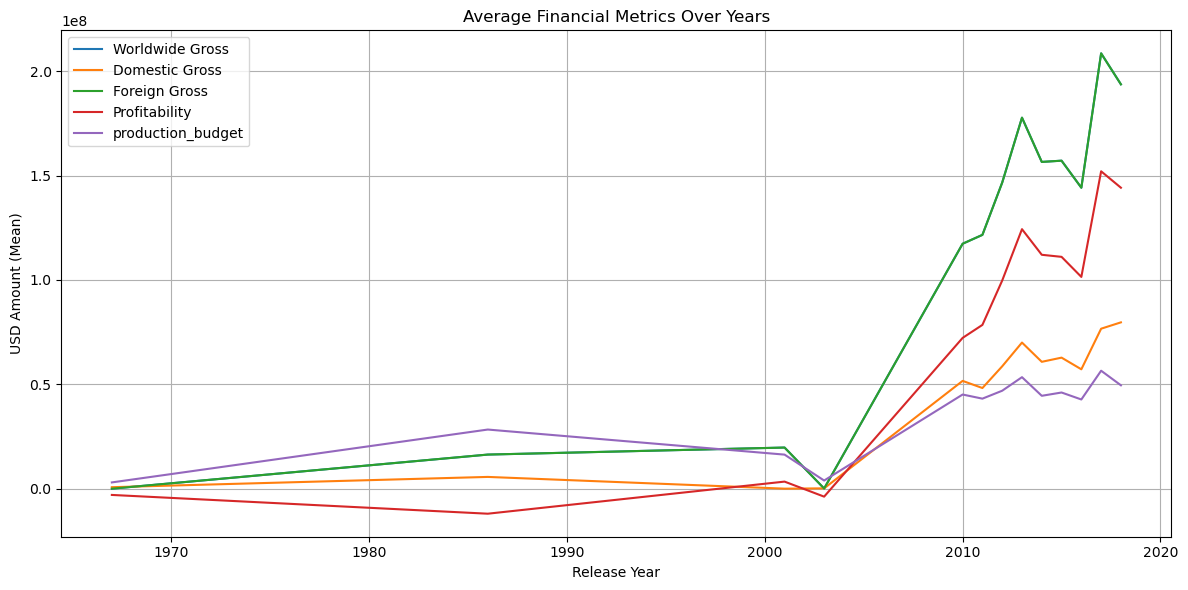

In [ ]:
# Group metrics by by release_year and calculate the average (or use .sum() if preferred)
metrics_by_year = (
    merged_df.groupby('release_year')[
        ['worldwide_gross', 'domestic_gross_y', 'foreign_gross', 'profitability','production_budget']
    ]
    .mean()
    .reset_index()
)

# Plot all lines
plt.figure(figsize=(12, 6))

plt.plot(metrics_by_year['release_year'], metrics_by_year['worldwide_gross'], label='Worldwide Gross')
plt.plot(metrics_by_year['release_year'], metrics_by_year['domestic_gross_y'], label='Domestic Gross')
plt.plot(metrics_by_year['release_year'], metrics_by_year['foreign_gross'], label='Foreign Gross')
plt.plot(metrics_by_year['release_year'], metrics_by_year['profitability'], label='Profitability')
plt.plot(metrics_by_year['release_year'], metrics_by_year['production_budget'], label='production_budget')

# Add plot details
plt.title('Average Financial Metrics Over Years')
plt.xlabel('Release Year')
plt.ylabel('USD Amount (Mean)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation of the line graph**  
The line graph above illustrates the trend of average financial performance metrics (revenue, cost, profit and return on investment) in the film industry over time, specifically focusing from the 1960s to around 2018. 
1. For several decades, these metrics remained relatively low and stable, with profitability even dipping into negative values, indicating that many movies may have struggled to recoup production costs. 
2. However, a significant shift occurred after 2005, where all metrics began to rise sharply. This surge, most notably in foreign gross and profitability, suggests the growing importance of international markets in driving film revenue.
3. The graph also reveals that foreign gross has consistently surpassed domestic gross since the early 2000s, underscoring the global expansion of the film industry.
   
*The notable increase in profitability during the same period indicates improved financial efficiency or broader audience reach. While the overall trend is upward, there is some volatility in later years, reflecting fluctuations in movie performance year to year.*

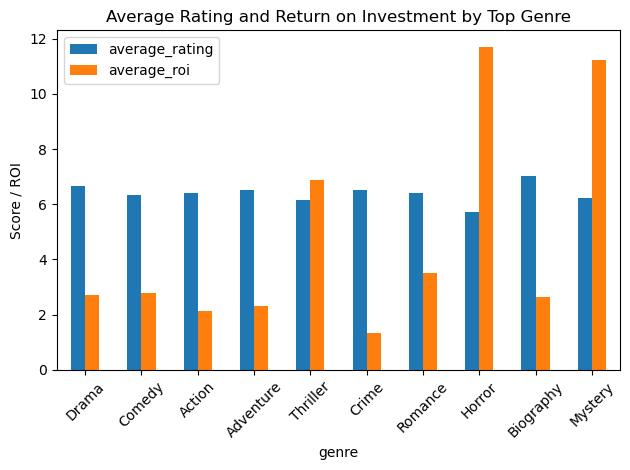

In [ ]:
# Bar plot for visualizing average rating and Return on Investment (ROI)
performance_df.set_index('genre')[['average_rating', 'average_roi']].plot(kind='bar')
plt.title('Average Rating and Return on Investment by Top Genre')
plt.ylabel('Score / ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation of the bar chart**  
The bar chart presents a comparison between the average rating and average return on investment (ROI) for a selection of top movie genres. Each genre has two bars: one blue bar representing average viewer ratings and one orange bar indicating average ROI.
1. From the chart, we observe that Drama, Comedy, Action, and Adventure all maintain consistent average ratings in the range of approximately 6.3 to 6.7, with moderate ROIs, typically around 2 to 3.
2. Thriller and Romance exhibit slightly lower ratings but higher ROI values, particularly Thriller, which has a noticeable ROI increase.
3. Notably, Horror and Mystery stand out for their exceptionally high ROIs, exceeding 11, despite Horror having the lowest average rating among all genres.
4. This suggests that horror films, although less critically acclaimed, tend to yield high financial returns. Biography leads in average rating but shows only a moderate ROI. In contrast, Crime shows both lower ROI and slightly below-average ratings.

*Overall, the chart highlights an important insight: genres with the highest audience ratings do not always generate the highest financial returns, and vice versa — with Horror and Mystery being prime examples of high-ROI, low-to-mid-rating genres.*


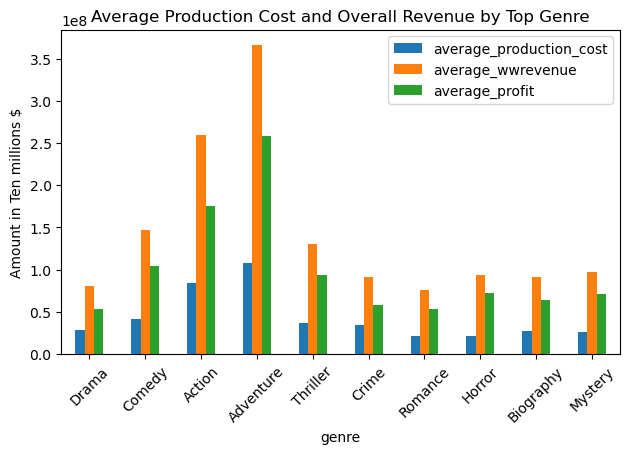

In [ ]:
# Bar plot of production cost, revenue and profit
performance_df.set_index('genre')[['average_production_cost', 'average_wwrevenue','average_profit' ]].plot(kind='bar')
plt.title('Average Production Cost and Overall Revenue by Top Genre')
plt.ylabel('Amount in Ten millions $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of the bar chart**  
The bar chart compares the average production cost, worldwide revenue, and profit for various top movie genres. Each genre is represented with three bars: blue for average production cost, orange for average worldwide revenue, and green for average profit. The values are scaled in tens of millions of dollars.
1. Among all genres, Adventure films stand out with the highest financial figures across the board, they have the highest average production cost, the highest worldwide revenue, and the highest profit, indicating strong commercial performance despite high expenses.
2. Action movies follow closely, also showing a large investment and substantial returns.
3. Comedy, Thriller, and Crime genres show moderate production costs with relatively healthy profits, suggesting they are financially efficient.
4. Interestingly, Drama, Romance, and Horror have relatively low production budgets but also yield lower revenues, though Horror maintains a decent profit margin relative to its cost.
5. Mystery and Biography genres, while not as lucrative as Action or Adventure, show a balanced ratio between production cost and profitability, indicating steady performance.

*Overall, the chart illustrates that while genres like Adventure and Action require the largest investments, they also generate the highest returns, whereas Drama and Romance operate with lower budgets and deliver modest profits.*

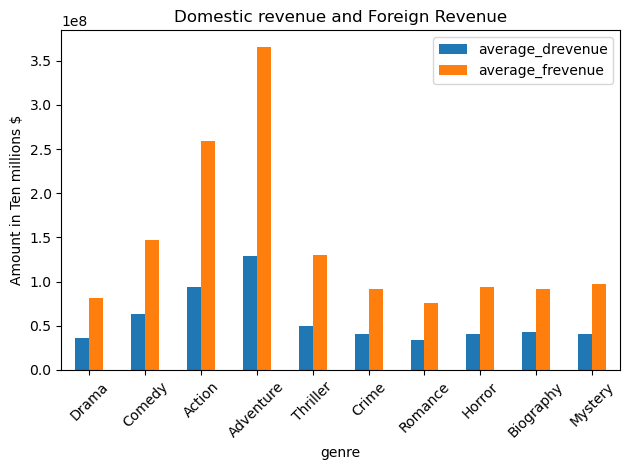

In [ ]:
# Bar plot for visualizing average rating and Return on Investment (ROI)
performance_df.set_index('genre')[['average_drevenue', 'average_frevenue']].plot(kind='bar')
plt.title('Domestic revenue and Foreign Revenue')
plt.ylabel('Amount in Ten millions $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of the bar chart**  
The bar chart illustrates the comparison between average domestic revenue and average foreign revenue across various movie genres. Each genre is represented by two bars: a blue bar for domestic revenue and an orange bar for foreign revenue, with all values expressed in tens of millions of dollars.
1. Across all genres, foreign revenue consistently outperforms domestic revenue, highlighting the growing importance of international markets for film profitability.
2. Adventure and Action genres generate the highest revenues in both categories, with Adventure leading by a significant margin—its foreign revenue exceeds $36 million on average, more than double its domestic counterpart.
3. Comedy, Thriller, and Crime genres also exhibit strong international performance, although their overall earnings are more modest compared to Action and Adventure films.
4. Genres such as Drama, Romance, Horror, Biography, and Mystery earn relatively less on average, yet even within these genres, foreign revenue surpasses domestic revenue.  
*The pattern suggests that international audiences are a crucial revenue source regardless of genre, and studios might benefit from tailoring content with global appeal. Overall, the chart underscores the dominance of foreign markets in driving box office success across the film industry.*

#### 4.3 Other performance metrics

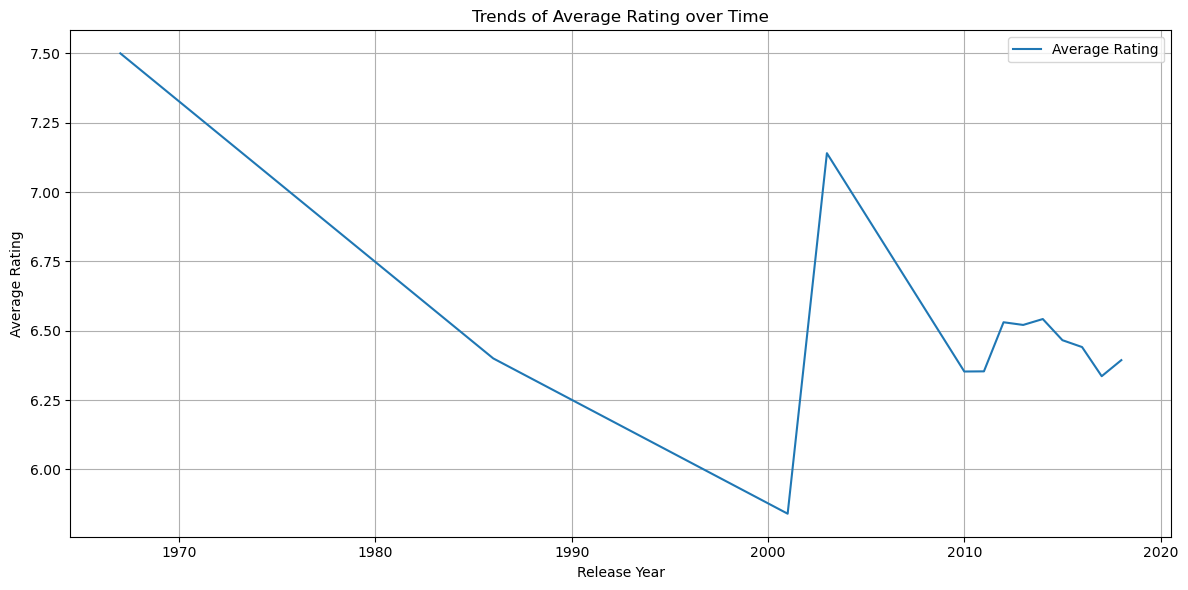

In [ ]:
# 4.3.1 Average rating trends
yearly_trends = (
    merged_df.groupby('release_year')[['averagerating']]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['release_year'], yearly_trends['averagerating'], label='Average Rating')

# Format plot
plt.title('Trends of Average Rating over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Line chart Interpretation**  
The line chart illustrates the trend of **average movie ratings over time**, based on release year. 
1. From the mid-1960s to around 2000, there is a noticeable **downward trend**, with average ratings steadily declining from around **7.5 to below 6.0**. This gradual drop may reflect changes in audience expectations, an increase in the number of lower-quality productions, or a broader variety of genres and content diluting average scores. It could also indicate a shift in how users rate films over time, with newer audiences possibly applying more critical standards.
2. Around the early 2000s, however, the chart shows a sharp **rebound in average ratings**, peaking again at over **7.0**, before gradually declining to stabilize between **6.3 and 6.5** in more recent years. This spike may be attributed to a period of high-quality or culturally impactful films, or potentially to anomalies in the dataset.
3. After this peak, the ratings fluctuate within a narrow range, suggesting a general stabilization in audience reception.

*The overall pattern highlights a long-term decline followed by partial recovery and consistency, which may reflect the industry's adaptation to audience preferences, critical standards, and evolving storytelling approaches.*

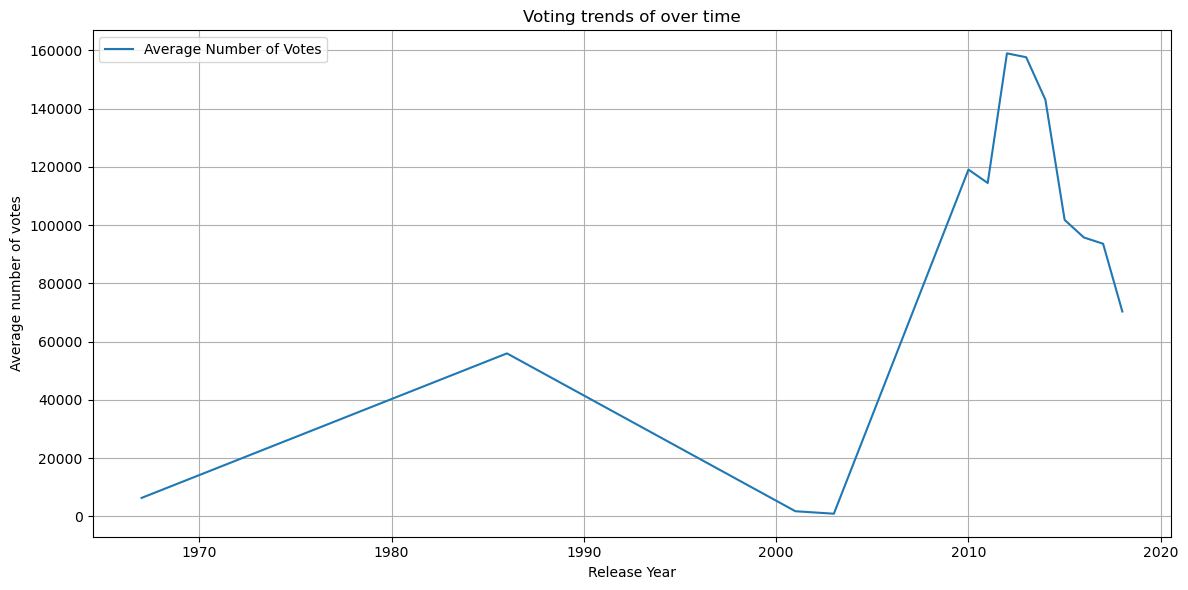

In [ ]:
# 4.3.2 Average voting trends
# Plot a line graph for average umber of votes
# Plot
yearly_trends = (
    merged_df.groupby('release_year')[['numvotes']]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))

plt.plot(yearly_trends['release_year'], yearly_trends['numvotes'], label='Average Number of Votes')

# Format plot
plt.title('Voting trends of over time')
plt.xlabel('Release Year')
plt.ylabel('Average number of votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Line chart Interpretation**  
The chart illustrates the trend of the **average number of audience votes** that movies received over time. 
1. From the late 1960s through the mid-1980s, there is a gradual increase in voting activity, with the average number of votes rising from below 10,000 to around 55,000. This upward trend indicates growing audience engagement and possibly the increasing accessibility of rating platforms like IMDb over time.
2. However, this rise is followed by a noticeable decline in the 1990s and early 2000s, where the average votes per film sharply drop to near zero.
3. Beginning around 2005, the chart shows a dramatic surge in the average number of votes, peaking between 2012 and 2014 with averages exceeding 150,000 votes. This spike likely coincides with the explosion of online platforms, wider internet access, and global user participation in rating systems.
4. Following the peak, the number of votes begins to decline again, possibly due to a larger volume of films being released (diluting votes), or newer releases having had less time to accumulate votes.

*Overall, the chart highlights how audience voting behavior has evolved—first with steady growth, then with digital-era acceleration, and more recently, a tapering in engagement.*

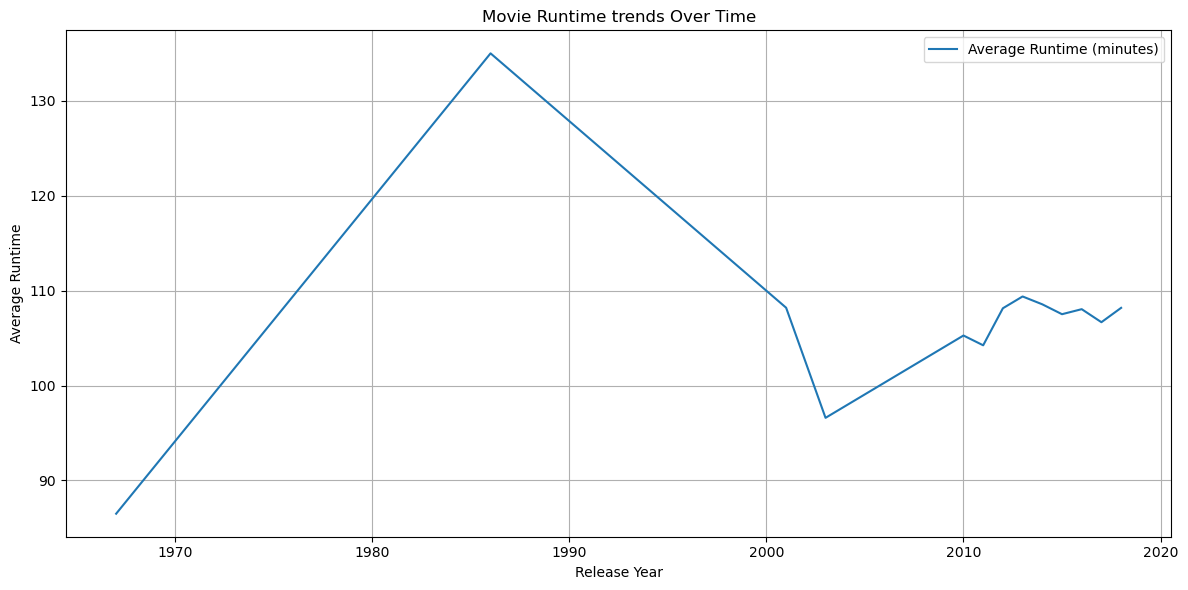

In [ ]:
# 4.3.3 Average runtime trends
# Group by release year and calculate average run time
yearly_trends = (
    merged_df.groupby('release_year')[['runtime_minutes']]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['release_year'], yearly_trends['runtime_minutes'], label='Average Runtime (minutes)')

# Format plot
plt.title('Movie Runtime trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Line chart Interpretation**  
The line chart illustrates the trend of average movie runtime over time, measured by release year.
1. From the late 1960s through the mid-1980s, there is a clear upward trajectory in runtime, peaking around 1986 with an average exceeding 135 minutes. This suggests that during this period, filmmakers may have been producing more elaborate or narratively complex films that required longer screen time.
2. However, after this peak, a consistent decline is observed through the 1990s and early 2000s, possibly reflecting changing audience preferences, tighter production budgets, or a shift toward faster-paced storytelling.
3. From around 2005 onward, the trend stabilizes with average runtimes hovering just above 100 minutes.

*Although there are minor fluctuations, the overall consistency suggests the industry has settled on a more standardized length for mainstream films. This could be influenced by streaming trends, theatrical scheduling preferences, or evolving attention spans of audiences. The chart reflects how movie durations have adapted over the decades in response to both creative direction and market forces.*

**Analysis for Studios**

In [ ]:
# 4.3.4  Average Return of Investment by studio
# Group the ROI by studio and calculate average ROI
studio_roi = (
    merged_df.groupby('studio')['ROI']
    .mean()
    .reset_index()
    .rename(columns={'ROI': 'avg_ROI'})
)

# Sort and select top 10
top10_studios_by_roi = studio_roi.sort_values('avg_ROI', ascending=False).head(10)

# Display the result
print(top10_studios_by_roi)


      studio    avg_ROI
79       UTV  17.175831
85   WB (NL)  14.141873
61      ParV   9.099338
52     Orch.   8.538213
28        FD   7.976125
35  GrtIndia   7.783430
80      Uni.   7.746671
12   BH Tilt   6.034521
60      Par.   5.745224
77      TriS   4.643049


In [ ]:
# 4.3.5 Average studio rating by genre (top 3)
# List of genre dummy columns
genre_columns = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Biography', 'Mystery'
]

# Loop through each genre and compute top 3 studios
top_3_by_genre = []

for genre in genre_columns:
    # Filter movies that belong to the genre
    genre_df = merged_df[merged_df[genre] == 1]

    # Group by studio and calculate average rating
    grouped = (
        genre_df.groupby('studio')['averagerating']
        .mean()
        .reset_index()
        .rename(columns={'averagerating': 'avg_rating'})
    )

    # Get top 3 studios for this genre
    top_3 = grouped.sort_values('avg_rating', ascending=False).head(3)
    top_3['genre'] = genre  # Add genre info

    # Store the result
    top_3_by_genre.append(top_3)

# Combine all results
final_top3_df = pd.concat(top_3_by_genre, ignore_index=True)

# Optional: sort result for presentation
final_top3_df = final_top3_df.sort_values(['genre', 'avg_rating'], ascending=[True, False])

# Display
print(final_top3_df)


       studio  avg_rating      genre
6         UTV    8.500000     Action
7    GrtIndia    8.300000     Action
8         BSC    8.100000     Action
9        App.    9.200000  Adventure
10         VE    8.000000  Adventure
11      Orch.    7.900000  Adventure
24        UTV    8.500000  Biography
25       Neon    7.500000  Biography
26       Par.    7.450000  Biography
3       Orch.    7.900000     Comedy
4        Neon    7.500000     Comedy
5   Cleopatra    7.400000     Comedy
15       MBox    7.800000      Crime
16        SPC    7.633333      Crime
17      Drft.    7.300000      Crime
0    GrtIndia    8.300000      Drama
1         BSC    8.100000      Drama
2       Orch.    7.900000      Drama
21   Studio 8    7.700000     Horror
22         BV    7.400000     Horror
23        SPC    7.400000     Horror
27       MBox    7.800000    Mystery
28   Studio 8    7.700000    Mystery
29      Osci.    7.500000    Mystery
18         DR    7.800000    Romance
19        BST    7.400000    Romance
2

**Interpretation of 4.3.4  and 4.3.5 - Studios**  
The combined analysis of the top-performing studios by **Return on Investment (ROI)** and **average rating by genre** highlights a few standout production houses that balance both **financial performance** and **critical acclaim**. 
1. At the top of the ROI chart is **UTV**, boasting an impressive average ROI of **17.18**, followed closely by **WB (NL)** with **14.14** and **ParV** with **9.10**. UTV also appears in the average rating table, producing highly rated films in both **Action (8.5)** and **Biography (8.5)** genres. This positions UTV as not only financially efficient but also creatively successful.
2. Similarly, **GrtIndia**, ranked fifth in ROI, is featured in high-rated Action and Drama genres, both scoring **8.3**, reinforcing its strong dual performance in profitability and storytelling quality.
3. Studios like **Orch.** and **BSC** also emerge as noteworthy players, appearing on both lists. **Orch.**, while ranking fourth in ROI, contributes to top-rated films across several genres including **Adventure, Comedy, and Drama** (all rated 7.9), suggesting a versatile and effective production strategy.
4. **BSC** maintains high ratings in Action and Drama, each with **8.1**, adding further evidence that studios with high ROI can also deliver audience-pleasing content.
5. Some studios like **Studio 8** and **SPC** are more prominent in the average rating chart across genres like Horror, Mystery, and Thriller, they are not top ROI earners—indicating that while their films are critically appreciated, they may not be as financially optimized.
  
*Overall, the cross-comparison reveals that a select few studios, especially UTV and GrtIndia, excel in achieving both commercial success and audience satisfaction.*

## 5. CONCLUSIONS

#### 5.1 Genres
1.  Overall, mainstream and emotionally resonant genres like **Drama**, **Comedy**, and **Action** are popular in the movie industry and on demand among the audience. Specialized or genre-specific categories such as **Western**, **Musical**, and **News** are comparatively rare.
2. Genre combinations having a common occurrence included **Drama + Romance**, **Action + Adventure**, and **Thriller + Crime**. Some genres like **Horror**, ***Mystery**, and **Biography** were most frequently used in focused or specialized narratives.
3. Genres maintained an even spread of releases throughout the year (Ex. **Action**, **Comedy**, and **Adventure**), others exhibited strong seasonal preferences especially in Autumn and Winter indicating targeted release strategies possibly tied to awards seasons, holidays, or peak box office periods. Specifically 
#### 5.2 Financial performance
1. Average performance metrics across top ten major movie genres indicate that:  
   a). **Adventure** and **Action** dominate as the most expensive genres to produce, with average production costs with relatively high returns.  
   b). **Horror** and **Mystery** emerge as the most financially efficient genres, posting the highest average return on investment (ROI) at 11.71 and 11.24, respectively. These genres are comparatively inexpensive to produce but yield disproportionately high returns, making them highly attractive to studios with limited budgets or those seeking high-margin ventures.  
   c). **Romance** and **Drama** maintain a balance between audience appreciation and profitability, offering moderate ROI and good ratings.  
   d). **Crime** and **Thriller** although reasonably profitable, deliver lower ROI, suggesting they may carry more financial risk unless backed by strong scripts or cast.
2. In the film industry, investments will likely depend on the choice of strategy. Current trends indicate that studios seeking *blockbuster success* should focus on **Adventure** and **Action**. Studios that prefer prioritizing *efficiency and high returns* should look to **Horror**, **Mystery**, or **Romance**. Studios aiming for *critical acclaim or awards recognition* may find the best value in **Biography** and **Drama**. This table underscores that different genres fulfill different strategic objectives, and aligning production choices with business goals is key to success in the film industry
3. Over the last 15 years, financial trends on revenue, costs and profitability present an upward trend implying market growth for box office movies, especially the foreign markets.
4. Genres with the highest audience ratings do not always generate the highest financial returns, and vice versa. **Horror** and **Mystery** are some  examples of high-ROI, low-to-mid-rating genres.
#### 5.3 Markets
1. Foreign revenue consistently outperforms domestic revenue, highlighting the growing importance of international markets for film profitability. International audiences are a crucial revenue source regardless of genre, and studios might benefit from tailoring content with global appeal.   
    a). Adventure and Action genres generate the highest revenues in both foreign and domestic markets  
    b). Adventure presents a significant margin it's foreign revenue i.e More than double its domestic market  
    c). Comedy, Thriller, and Crime genres also exhibit strong international performance  
#### 5.3 Average Rating
1. Overall average rating patterns show a long-term decline followed by partial recovery and consistency, which may reflect the industry's adaptation to audience preferences, critical standards, and evolving storytelling approaches
2. Voting behavior has evolved, first with steady growth, then with digital-era acceleration, and subsequently a decline possibly due to a larger volume of films being released (diluting votes), or newer releases having had less time to accumulate votes.
3. **Biography** has the highest-rated genre, followed closely by **Drama** and **Adventure**, indicating these genres tend to deliver strong storytelling and quality content appreciated by viewers

#### 5.4 Other performance measures
1. **Average Runtime** The industry has settled on a more standardized length for mainstream films. This could be influenced by streaming trends, theatrical scheduling preferences, or evolving attention spans of audiences.
2. Standout production houses that balance both **financial performance** and **critical acclaim** based on ROI and average rating by genres were  
   a). **UTV** was financially efficient and also creatively successful in the production of **Action** and **Biography** genres.  
   b). **GrtIndia** was best placed in the production of high-rated **Action** and **Drama** genres    
   c). **Orch.** produced top-rated films across several genres including **Adventure, Comedy, and Drama**  
   d). **BSC** maintains high ratings in **Action** and **Drama**  
   e). **Studio 8** and **SPC** are more prominent in the average rating across genres like **Horror**, **Mystery**, and **Thriller**, they are not top ROI earners—indicating that while their films are critically appreciated, they may not be as financially optimized

## 6. RECOMMENDATIONS

#### 6.1 Investment Portfolio 
1. High budget: The data shows Action and Adventure titles cost the most but also pull in the widest audiences and sells best overseas. They are best launched in the spring or summer, when blockbuster demand is highest and foreign box-office potential is strongest. Success strategy: pack theaters worldwide and hit the release window that maximises revenue.  
2. Mid budget: Conclusions point out that Drama mixed with Romance or Crime paired with Thriller delivers a healthy balance of good ratings, decent ROI, and festival attention without runaway budgets. Success strategy - Target festival buzz and good reviews for free marketing, helping these films earn steadily year-round and boosting the studio’s reputation.  
3. Low budget: Horror and Mystery/Thriller are inexpensive to make yet top the ROI tables, according to the study. By capping budgets below $10 million and timing releases near Halloween or other proven windows, can limit risk while giving a chance at the next breakout hit.
#### 6.2 Marketing strategy
1. More than two-thirds of a movie’s earnings now come from foreign audiences. Every project should plan with the foreign market needs in mind. That means budgeting early for translated trailers, posters and social media content aimed at the three biggest foreign markets for each film.